In [1]:
# import all the necessary libraries

import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the dataset and look at the first five rows 

df = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
df[['country', 'description', 'points']].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [4]:
# group by country

country = df.groupby('country')

# summarize the statistics of all the countries

country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

In [5]:
country.mean().sort_values('points', ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


In [6]:
# this is to check how many countries are present

df_country = df['country'].unique()
print("there are ",len(df_country), "countries in the dataset")

there are  44 countries in the dataset


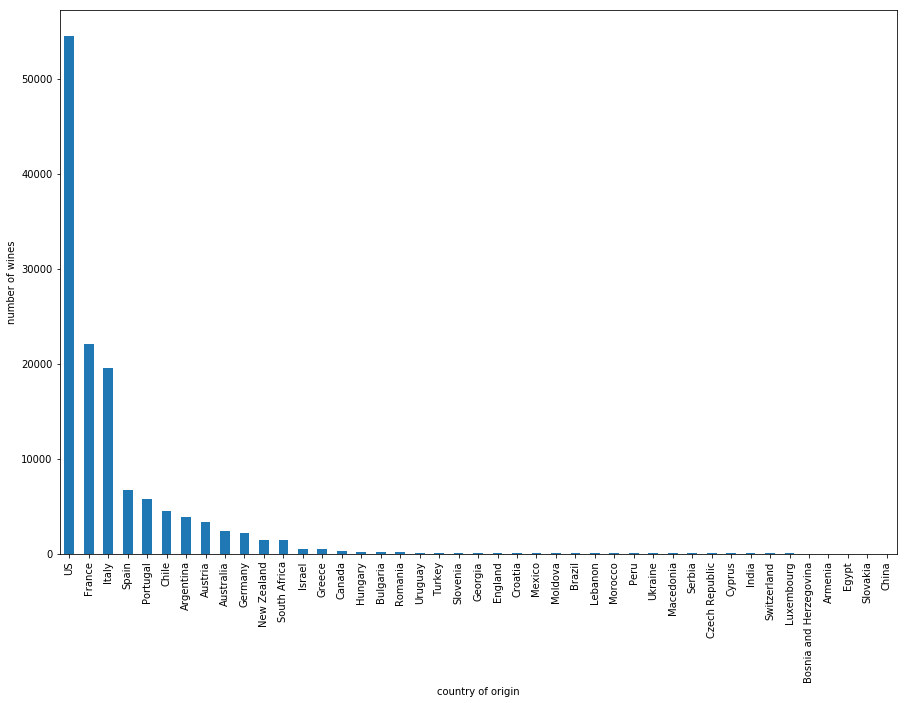

In [7]:
# plot number of wines by country using matplotlib

plt.figure(figsize=(15,10))

country.size().sort_values(ascending=False).plot.bar()
plt.xlabel("country of origin")
plt.ylabel("number of wines")

plt.show()

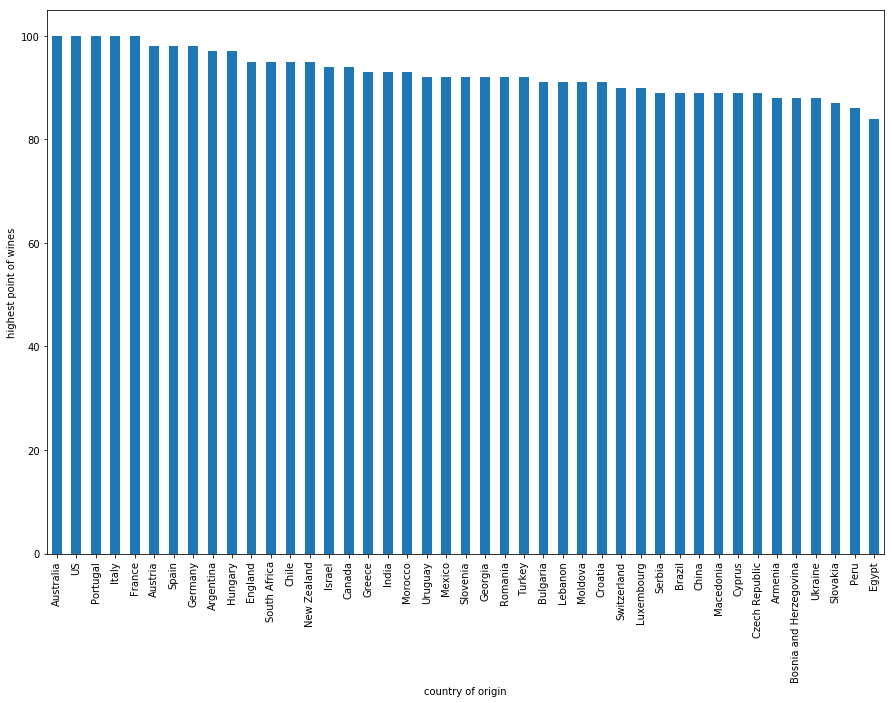

In [8]:
# plot for the highest rated wines among all the 44 countries

plt.figure(figsize=(15,10))

country.max().sort_values(by="points",ascending=False)['points'].plot.bar()
plt.xlabel("country of origin")
plt.ylabel("highest point of wines")

plt.show()

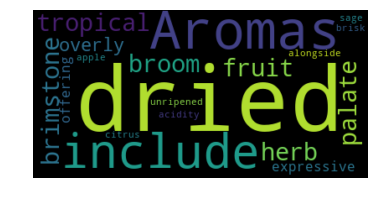

In [9]:
# let's check by considering only the first description

text = df.description[0]

word_cloud = WordCloud().generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

plt.show()

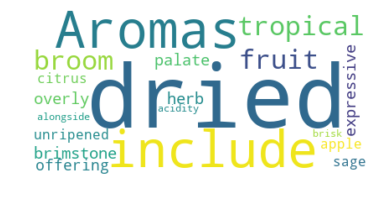

In [10]:
# play around with the optional arguments of the WordCloud

text = df.description[0]

word_cloud = WordCloud(max_words=100, background_color='white').generate(text)
plt.figure()
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [11]:
# saving the image if needed, using to_file function of the WordCloud

word_cloud.to_file('wcloud.png')

In [12]:
# consider all the descriptions  

text = " ".join(words for words in df.description)

print("There are {} words in the combination of all reviews.".format(len(text)))

There are 31661073 words in the combination of all reviews.


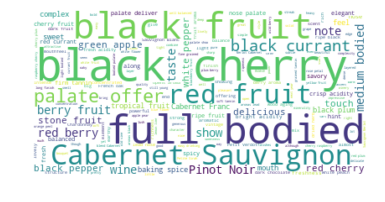

In [13]:
# create stopwords list which need to be added to the existing list using update function

stopwords = set(STOPWORDS)
stopwords.update(['drink', 'now', 'wine', 'flavor', 'flavors'])

word_cloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [16]:
word_cloud.to_file('wcloud.png')

In [14]:
# read the mask image

mask_img = np.array(Image.open("wine-bottle.png"))

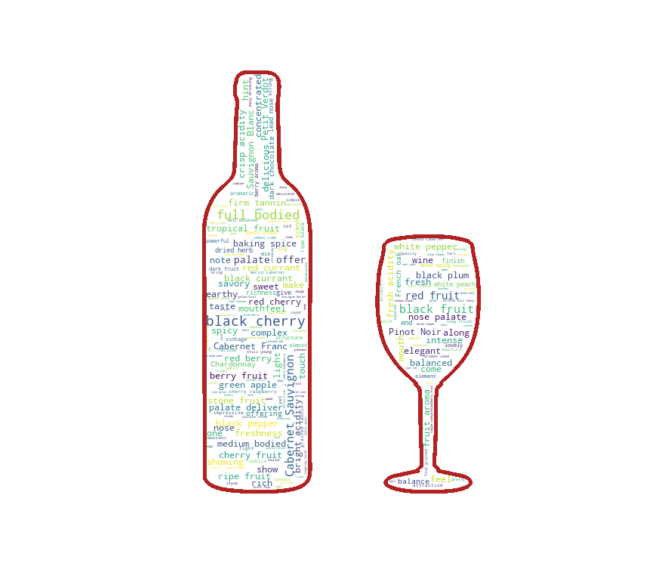

In [15]:
wc = WordCloud(background_color="white", max_words=1000, mask=mask_img,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("wine.png")

# show 
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

plt.show()